In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 전국 병원 분석

In [36]:
df = pd.read_excel("data/전국 병의원 및 약국 현황 2024.9/1.병원정보서비스 2024.9.xlsx")
df.head(3)

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
0,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교 성빈센트병원,1,상급종합,310000,경기,310603,수원팔달구,지동,16247,...,0,0,7,0,0,0,0,0,127.027427,37.277985
1,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교인천성모병원,1,상급종합,220000,인천,220003,인천부평구,부평동,21431,...,0,0,3,0,0,0,0,0,126.724899,37.484831
2,JDQ4MTYyMiM1MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...,강릉아산병원,1,상급종합,320000,강원,320100,강릉시,사천면,25440,...,0,0,2,0,0,0,0,0,128.857841,37.818433


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78126 entries, 0 to 78125
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   암호화요양기호     78126 non-null  object 
 1   요양기관명       78126 non-null  object 
 2   종별코드        78126 non-null  int64  
 3   종별코드명       78126 non-null  object 
 4   시도코드        78126 non-null  int64  
 5   시도코드명       78126 non-null  object 
 6   시군구코드       78126 non-null  int64  
 7   시군구코드명      78126 non-null  object 
 8   읍면동         77609 non-null  object 
 9   우편번호        78126 non-null  int64  
 10  주소          78126 non-null  object 
 11  전화번호        77699 non-null  object 
 12  병원홈페이지      8335 non-null   object 
 13  개설일자        78126 non-null  int64  
 14  총의사수        78126 non-null  int64  
 15  의과일반의 인원수   78126 non-null  int64  
 16  의과인턴 인원수    78126 non-null  int64  
 17  의과레지던트 인원수  78126 non-null  int64  
 18  의과전문의 인원수   78126 non-null  int64  
 19  치과일반의 인원수   78126 non-nul

## 전국병원 산점도

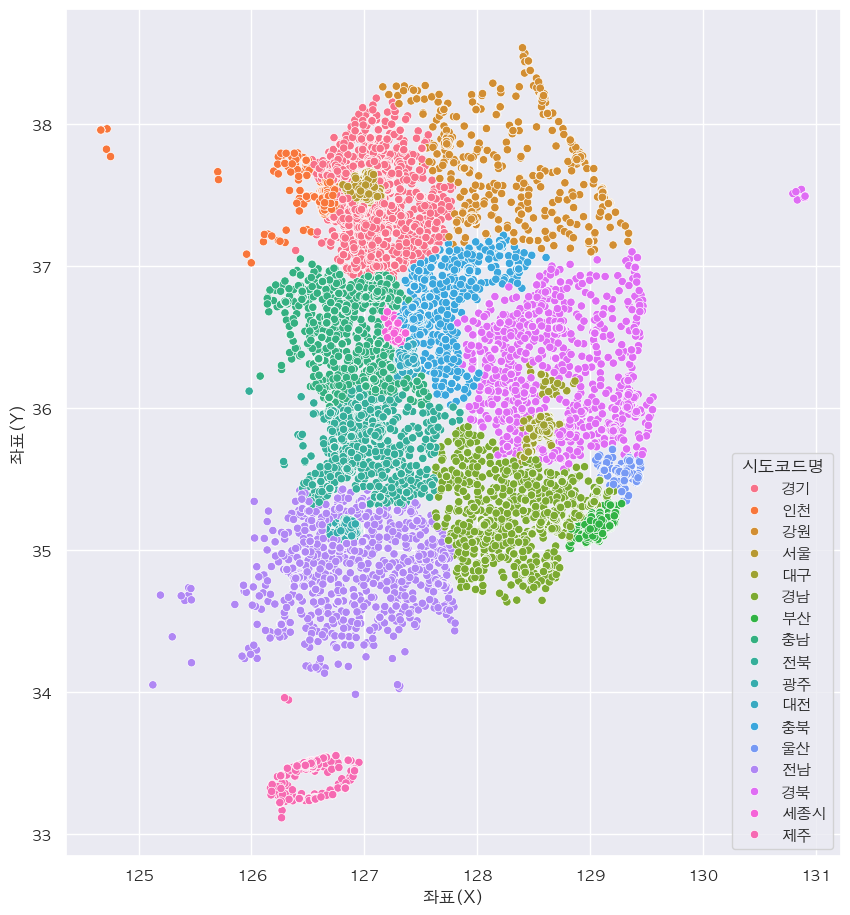

In [37]:
plt.figure(figsize = [10,11])
sns.scatterplot(data = df, x = "좌표(X)", y = "좌표(Y)", hue=  "시도코드명")
plt.show()

## 지역별 병원 종류 수

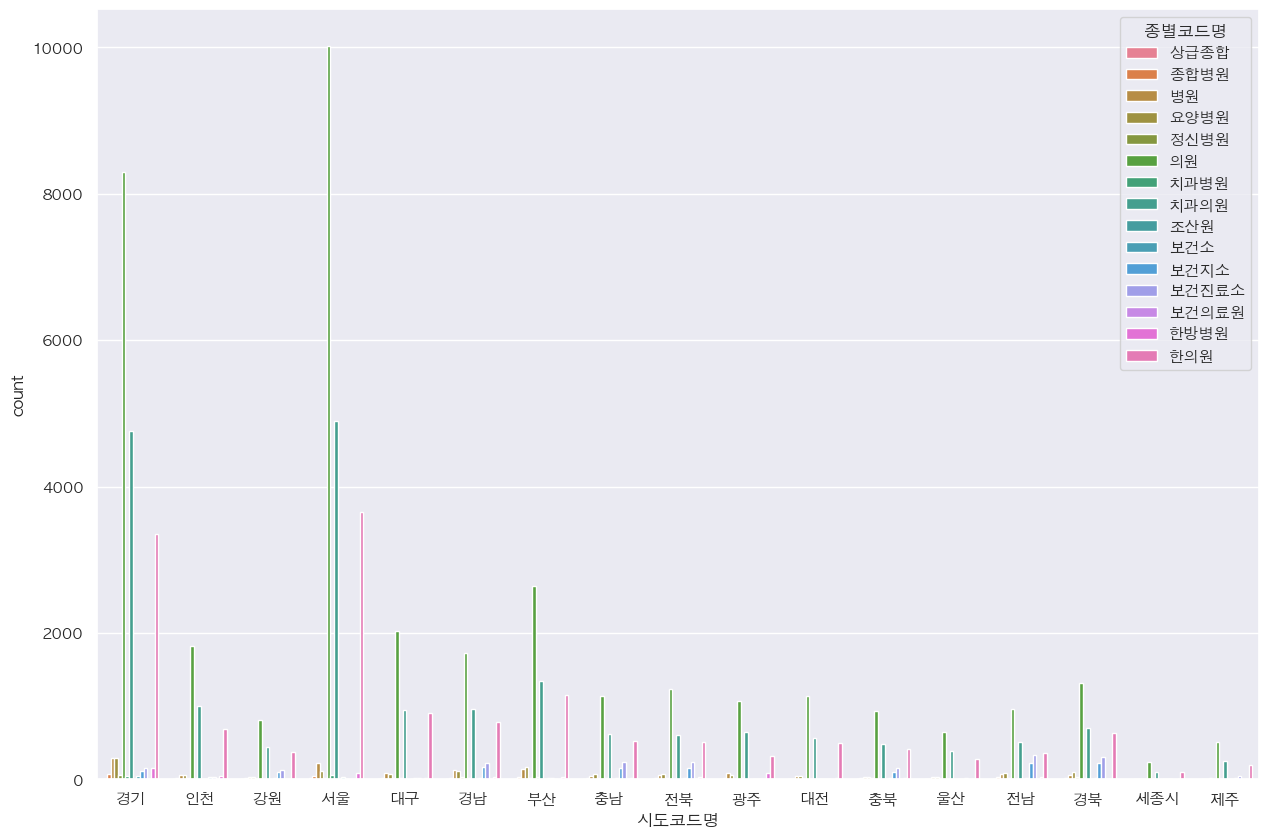

In [38]:
plt.figure(figsize = [15,10])
sns.countplot(data = df, x = "시도코드명", hue = "종별코드명")
plt.show()

## 지역별 상급종합병원의 수

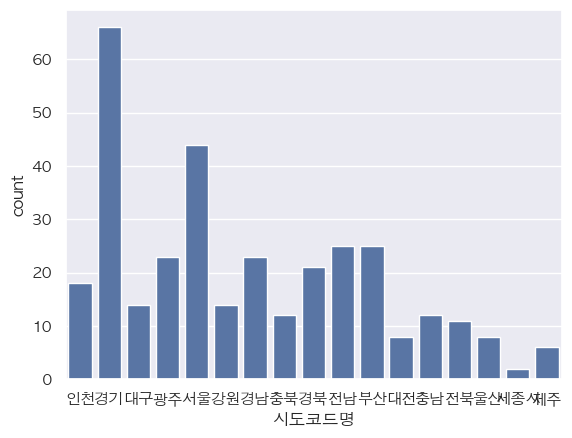

In [14]:
df_high = df[df["종별코드명"] == "종합병원"]
df_high["시도코드명"].value_counts()
sns.countplot(data = df_high, x="시도코드명")
plt.show()

## 지역별 병원 수

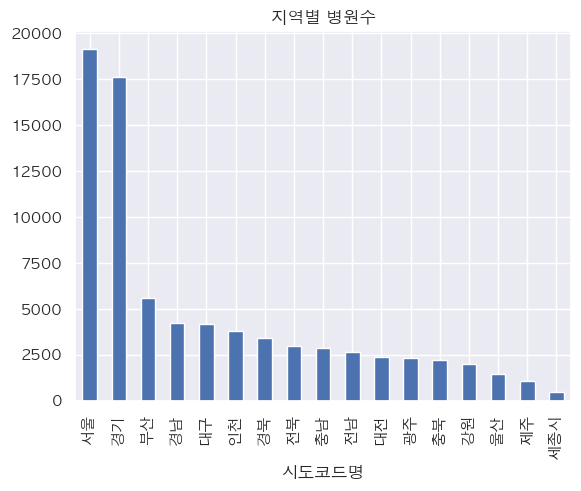

In [39]:
df["시도코드명"].value_counts().plot.bar()
plt.title("지역별 병원수")
plt.show()

In [16]:
df_seoul = df[df["시도코드명"] == "서울"]
df_seoul

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
3,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강북삼성병원,1,상급종합,110000,서울,110016,종로구,평동,3181,...,0,0,4,0,0,0,0,0,126.967750,37.568408
4,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,건국대학교병원,1,상급종합,110000,서울,110023,광진구,화양동,5030,...,0,0,2,0,0,0,0,0,127.071828,37.540376
7,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경희대학교병원,1,상급종합,110000,서울,110007,동대문구,회기동,2447,...,0,0,0,0,0,0,0,0,127.051852,37.594119
9,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,고려대학교의과대학부속구로병원,1,상급종합,110000,서울,110005,구로구,구로동,8308,...,6,18,11,0,0,0,0,0,126.884870,37.492052
17,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,삼성서울병원,1,상급종합,110000,서울,110001,강남구,일원동,6351,...,0,4,14,0,0,0,0,0,127.085151,37.488298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78100,JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxMTkxIzExIyQxIy...,흥인경희한의원,93,한의원,110000,서울,110016,종로구,창신동,3105,...,0,0,0,1,0,0,0,0,127.012482,37.572343
78103,JDQ4MTg4MSM1MSMkMSMkMCMkMTMkNDgxOTYxIzMxIyQxIy...,희당한의원,93,한의원,110000,서울,110020,양천구,신정동,8009,...,0,0,0,1,0,0,0,0,126.876418,37.522275
78110,JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxOTYxIzIxIyQxIy...,희한의원,93,한의원,110000,서울,110022,노원구,중계동,1726,...,0,0,0,1,0,0,0,0,127.081810,37.646301
78119,JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxOTYxIzUxIyQxIy...,힘내라한의원,93,한의원,110000,서울,110003,강서구,가양동,7526,...,0,0,0,2,0,0,0,0,126.855061,37.561526


# 서울의 병원 분석

## 서울의 상급병원 


In [17]:
#일단 결측치부터 제거하자
df_seoul_high = df_seoul["종별코드명"].str.contains("종합병원|상급종합")
print(df_seoul.count())

암호화요양기호       19158
요양기관명         19158
종별코드          19158
종별코드명         19158
시도코드          19158
시도코드명         19158
시군구코드         19158
시군구코드명        19158
읍면동           19150
우편번호          19158
주소            19158
전화번호          18966
병원홈페이지         2998
개설일자          19158
총의사수          19158
의과일반의 인원수     19158
의과인턴 인원수      19158
의과레지던트 인원수    19158
의과전문의 인원수     19158
치과일반의 인원수     19158
치과인턴 인원수      19158
치과레지던트 인원수    19158
치과전문의 인원수     19158
한방일반의 인원수     19158
한방인턴 인원수      19158
한방레지던트 인원수    19158
한방전문의 인원수     19158
조산사 인원수       19158
좌표(X)         18717
좌표(Y)         18717
dtype: int64


## 서울 구별 상급병원의 수

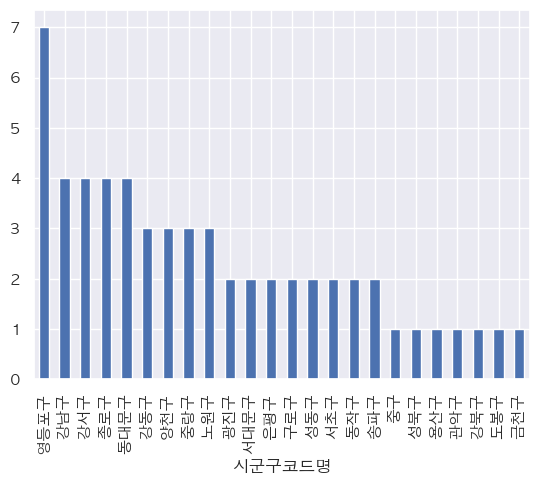

In [40]:
df_seoul_high_last = df_seoul[df_seoul_high]
df_seoul_high_last["시군구코드명"].value_counts().plot.bar()
plt.show()

In [41]:
df_seoul_high_last["요양기관명"]

3                               강북삼성병원
4                              건국대학교병원
7                              경희대학교병원
9                      고려대학교의과대학부속구로병원
17                              삼성서울병원
18                             서울대학교병원
23                  연세대학교의과대학 강남세브란스병원
24                     연세대학교의과대학세브란스병원
28                   이화여자대학교의과대학부속목동병원
31                 재단법인아산사회복지재단 서울아산병원
35                             중앙대학교병원
40     학교법인 고려중앙학원 고려대학교의과대학부속병원(안암병원)
42               학교법인가톨릭학원가톨릭대학교서울성모병원
45                             한양대학교병원
53                      가톨릭대학교 여의도성모병원
54                       가톨릭대학교 은평성모병원
57                             강남베드로병원
60                         강동경희대학교의대병원
80                                경찰병원
95                              구로성심병원
100                            국립중앙의료원
109                               기쁨병원
113                          노원을지대학교병원
114                               녹색병원
122                             대림성모병원
138                      

## 서울의 시군구별 종합병원 지도

In [21]:
import folium
lat = df_seoul_high_last["좌표(Y)"].mean()
long = df_seoul_high_last["좌표(X)"].mean()
m = folium.Map([lat,long])

for n in df_seoul_high_last.index:
    folium.Marker([df_seoul_high_last.loc[n,"좌표(Y)"],df_seoul_high_last.loc[n,"좌표(X)"]],
                 tooltip = df_seoul_high_last.loc[n,"요양기관명"],
                 popup = df_seoul_high_last.loc[n,"주소"]
                 ).add_to(m)

m

## 시군구별 종합병원 산점도

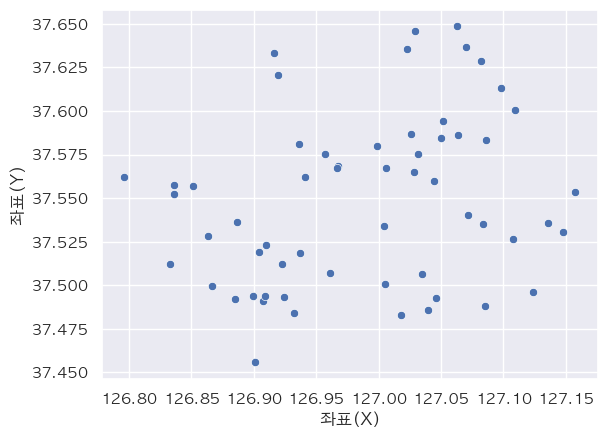

In [22]:
sns.scatterplot(data = df_seoul_high_last, x = "좌표(X)", y = "좌표(Y)")
plt.show()

In [23]:
df_seoul["좌표(Y)"].isnull().sum()


441

In [24]:
df_seoul_notnull = df_seoul[df_seoul["좌표(Y)"].notnull()].copy()

In [25]:
import folium

In [26]:
lat = df_seoul_notnull["좌표(Y)"].mean()
long = df_seoul_notnull["좌표(X)"].mean()

In [27]:
m = folium.Map([lat, long],
              zoom_start= 12)

for n in df_seoul_notnull.index:
    folium.Marker([df_seoul_notnull.loc[n,"좌표(Y)"],df_seoul_notnull.loc[n,"좌표(X)"]],
                 
                 ).add_to(m)

#m #이렇게 해버리면 정보가 너무 많아서 렉이 걸린다. 더 전처리 해보자! 동작구로

# 동작구 동네 병원 분석

In [42]:
df_seoul_dongjak = df_seoul_notnull[df_seoul_notnull["시군구코드명"] == "동작구"].copy()
df_seoul_dongjak

,암호화요양기호,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,조산사 인원수,좌표(X),좌표(Y)
35,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,중앙대학교병원,1,상급종합,110000,서울,110008,동작구,흑석동,6973,...,0,0,8,0,0,0,0,0,126.960784,37.506748
169,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,서울특별시보라매병원,11,종합병원,110000,서울,110008,동작구,신대방동,7061,...,1,3,7,0,0,0,0,0,126.923906,37.493441
633,JDQ4MTg4MSM1MSMkMSMkMCMkOTkkMzgxMzUxIzIxIyQxIy...,더본병원,21,병원,110000,서울,110008,동작구,사당동,7014,...,0,0,0,0,0,0,0,0,126.981493,37.482553
1139,JDQ4MTg4MSM1MSMkMSMkMCMkOTkkMzgxMzUxIzMxIyQxIy...,연세바른병원,21,병원,110000,서울,110008,동작구,사당동,7013,...,0,0,0,0,0,0,0,0,126.980581,37.484392
1513,JDQ4MTg4MSM1MSMkMSMkMCMkOTkkMzgxMzUxIzIxIyQxIy...,정동병원,21,병원,110000,서울,110008,동작구,상도1동,6919,...,0,0,0,0,0,0,0,0,126.949457,37.504938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77572,JDQ4MTg4MSM1MSMkMSMkMCMkMTMkNDgxOTYxIzExIyQxIy...,현함한의원,93,한의원,110000,서울,110008,동작구,상도동,6967,...,0,0,0,1,0,0,0,0,126.943906,37.499357
77747,JDQ4MTg4MSM1MSMkMSMkMCMkMTMkNDgxMzUxIzUxIyQxIy...,홍익한의원,93,한의원,110000,서울,110008,동작구,사당동,7010,...,0,0,0,1,0,0,0,0,126.972000,37.483420
77824,JDQ4MTg4MSM1MSMkMSMkMCMkMTMkMzgxNzAyIzUxIyQxIy...,화남한의원,93,한의원,110000,서울,110008,동작구,사당동,6997,...,0,0,0,1,0,0,0,0,126.981894,37.488296
78010,JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxMTkxIzMxIyQxIy...,효성한의원,93,한의원,110000,서울,110008,동작구,상도동,6937,...,0,0,0,1,0,0,0,0,126.938837,37.504963


In [43]:
lat = df_seoul_dongjak["좌표(Y)"].mean()
long = df_seoul_dongjak["좌표(X)"].mean()

In [44]:
df_seoul_dongjak["주소"]

35                         서울특별시 동작구 흑석로 102, (흑석동)
169                     서울특별시 동작구 보라매로5길 20, (신대방동)
633                        서울특별시 동작구 동작대로 67, (사당동)
1139     서울특별시 동작구 사당로 300, 2·4층일부및3  층 (사당동, 이수자이)
1513                      서울특별시 동작구 양녕로 283, (상도1동)
                            ...                    
77572                      서울특별시 동작구 장승배기로 4, (상도동)
77747                 서울특별시 동작구 사당로14길 13, 3층 (사당동)
77824                     서울특별시 동작구 동작대로 129, (사당동)
78010                   서울특별시 동작구 상도로 181, 1층 (상도동)
78090          서울특별시 동작구 서달로 150, 221호 (흑석동, 해가든상가)
Name: 주소, Length: 586, dtype: object

## 동작구 동네 병원 지도

In [45]:
m = folium.Map([lat, long],
              zoom_start=13
              )

for n in df_seoul_dongjak.index:
    folium.Marker([df_seoul_dongjak.loc[n,"좌표(Y)"],df_seoul_dongjak.loc[n,"좌표(X)"]],
                    popup = df_seoul_dongjak.loc[n,"주소"],
                  tooltip=  df_seoul_dongjak.loc[n,"요양기관명"]
                 ).add_to(m)

m

## 동작구 동네 병원 클러스터

In [47]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long],
              zoom_start = 13)

markercluster = MarkerCluster().add_to(m)

for n in df_seoul_dongjak.index:
    folium.Marker([df_seoul_dongjak.loc[n,"좌표(Y)"],df_seoul_dongjak.loc[n,"좌표(X)"]],
                    popup = df_seoul_dongjak.loc[n,"주소"],
                  tooltip=  df_seoul_dongjak.loc[n,"요양기관명"]
                 ).add_to(markercluster)
m.save("hospital.html")
m

## 동작구 동별로 병원갯수 그래프

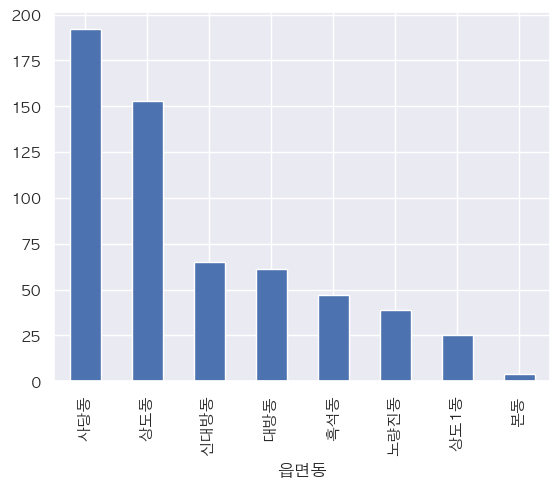

In [48]:
df_seoul_dongjak["읍면동"].value_counts().plot.bar()
plt.show()

## 동작구 동 별로 병원 종류 수

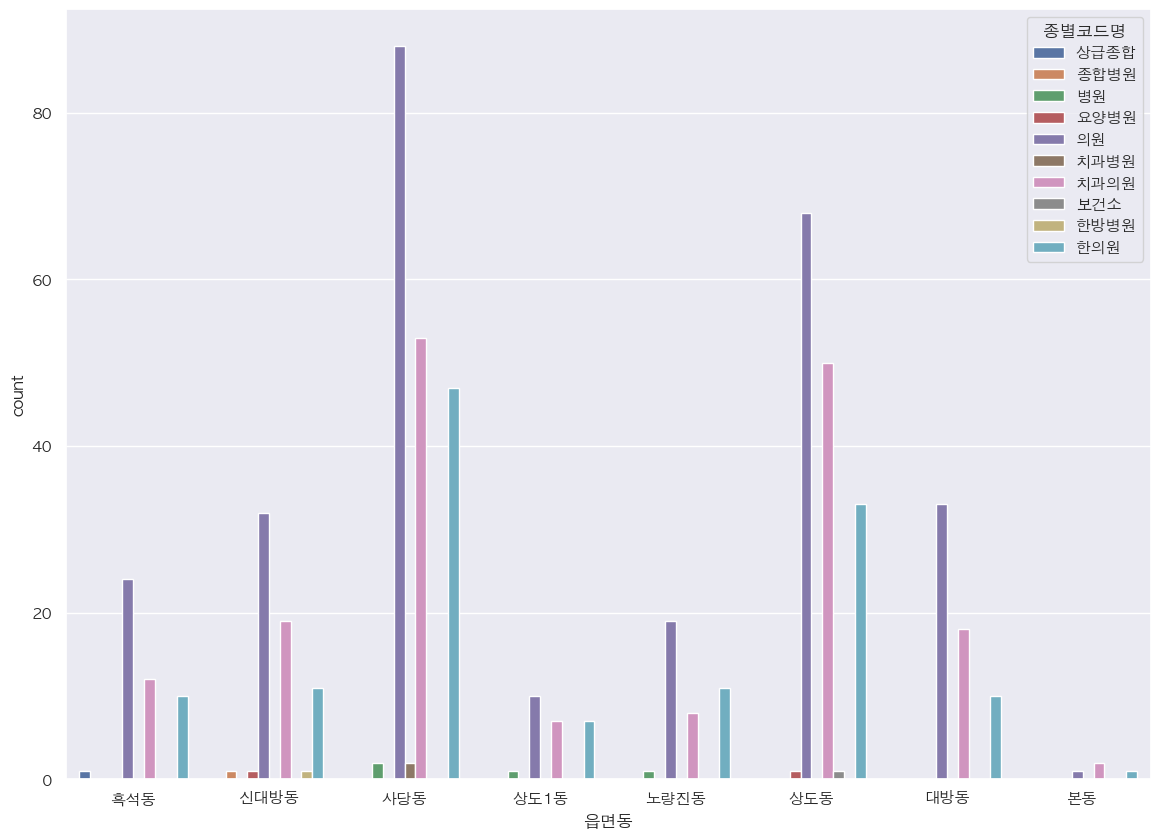

In [34]:
plt.figure(figsize = [14,10])
sns.countplot(data = df_seoul_dongjak, x ="읍면동", hue= "종별코드명")
plt.show()